## Week - 4 Assignment : Regression , Classification , Over fitting, Underfitting and Evaluation Metrics

Due Date : 24 Feb 2023 11:59 PM (EST)

## **Overview**
In this assignment, you'll complete two parts in order:
-   First, complete some analysis tasks(subjective questions) in this notebook.
-  Second, complete several coding tasks, writing python code based on the instructions. You'll submit this python notebook separately.

## **Background**

To complete this assignment, you'll need to know the following:
-   Python (NumPy, Pandas, Matplotlib, Scikit-learn)
-   Linear Algebra
-   Calculus
-   Probability and Statistics
-   Regression and Classification Models

## **Tutorial**

In case you are unfamiliar with the Python data ecosystem (NumPy, Pandas,scikit-learn), you are recommended to study the
first four chapters of the Python data science handbook. You can find the book here: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## **Reference**

-   [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- Speech and Language Processing (3rd ed. draft) - [Chapter 4](https://web.stanford.edu/~jurafsky/slp3/4.pdf)
- Speech and Language Processing (3rd ed. draft) - [Chapter 5](https://web.stanford.edu/~jurafsky/slp3/5.pdf)


## **Submission**

You will submit this notebook to ELMS.


### Theory Task 1: Overfitting and Underfitting



View the [image](https://drive.google.com/file/d/1QCXgJZ-vWtzmaAJqsM18TGHCMZw0HzQj/view)

![any name you like](https://drive.google.com/uc?export=view&id=1QCXgJZ-vWtzmaAJqsM18TGHCMZw0HzQj)


**Question 1.1** In the above figure, Does the model suffer from underfitting or overfitting? Why? How can you improve the model?

**Answer 1.1** The Model suffers from overfitting, because as training data reduces in loss / increases in accuracy, the validation data increases in loss and keeps a low accuracy. This implies that the model is fitted too tightly to the training data, and cannot properly fit to new validation data. This inability to properly predict new data is a indication of overfitting. The overfitting can be addressed with the following:

1. Data Augmentation
2. Feature Selection
3. Model Complexity Reduction

### Theory Task 2 :  Evaluation Metrics

**Question 2.1** Suppose you are building a model to predict whether a person has a rare disease that only affects 1% of the population. You have collected a dataset of 10,000 people, of which only 100 have the disease. You train your model and get an accuracy of 99%, which seems very high. However, you are concerned that the model may not be performing well on the minority class. What evaluation metric would you use to assess the model's performance, and why?

**Answer 2.1** The metric I would use is Recall. Recall is the percentage of correct positive predictions relative to total actual positives. This means that for a dataset, more of the correct values are captured by the model if the recall is high. If I was worried about the performance of a minority class, it would be because of the potential issue of the majority class dictating the predictions made by the model, therefore missing minority predictions. I would check the Recall metric to see if it missed predictions for that specific miniority class.


**Question 2.2** What evaluation metric would be most appropriate for a machine learning model that is used to screen patients for a certain disease in order to refer them for further testing, and why? Would you use precision or recall as the primary evaluation metric for this problem, and why?


**Answer 2.2** The metric I would use is Precision. Precision is a percentage of correct positive predictions relative to total positive predictions. This means that for each single prediction, that prediction is more likely to be correct if the model is precise. If I was running a test on a single patient, I would want to make sure those test results had the highest probability of being correct. I would not want to accidentally have a patient referred for further testing if they were negative, as that would be expensive for the patient and take medical resources away from other patients that were actually positive. I also would not want that patient to miss further testing if they needed it. Precision would be my choice here.

**Question 2.3** Given a dataset of medical records, including age, gender, blood pressure, cholesterol level, and heart disease diagnosis (yes/no), which classification algorithm - logistic regression or naive Bayes - would you choose to predict whether a new patient is likely to have heart disease or not, and why? The dataset has 1000 samples with a class distribution of 30% positive and 70% negative, and a total of 5 features.

**Answer 2.3** Logisitic Regression would be the best choice, as unlike Naive Bayes, it is sensitive to colinearity. Naive Bayes ignores colinearity. For this instance, there is clearly colinearity between attributes of heart disease. For example, there is most likely a relationship between blood pressure and cholesterol level, as a higher cholesterol could result in higher blood pressure. The model of choice should be able to react to this relationship, which makes Logistic Regression the better choice of the two.

## Coding Task 1 : Dataset Exploration

In this task, you will explore the dataset, clean it, and perform some basic analysis. You will use the cars dataset which contains about the price of cars and some of their features. The dataset is available in the file `car_dataset.csv`. The dataset contains the following columns:

-   `price`: the price of the car
-   `year`: the year in which the car was manufactured
-   `mileage`: the number of miles the car has been driven
-   `state`: the state in which the car is being sold
-   `make`: the make of the car
-   `model`: the model of the car
-   `engine`: the engine capacity of the car
-   `transmission`: the type of transmission the car has
-   `fuel`: the type of fuel the car uses
-   `seats`: the number of seats in the car
-   `seller_type`: the type of seller
-   `price_category`: the price category of the car

- The target variable is `price_category` which is a categorical variable with three possible values: `low`, `medium`, and `high`. The `price_category` column is the column you will try to predict using the other columns in the dataset.

In [265]:
# all full library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# all sklearn specific imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_auc_score

### **Data Loading and Tranformation**
- Load the dataset from the file "car_dataset.csv" into a pandas dataframe.
- Display the first 5 rows of the dataframe to ensure it has loaded correctly.
- Explore the dataset using descriptive statistics like mean, median, mode, standard deviation, and range.
- Check if there are any missing values in the dataset and handle them based on the column and data type. For example, you could choose to remove rows with missing values or fill in the missing values with appropriate values like the mean or mode.
- Remove the units from the numerical columns and convert them to the appropriate data type. For example, the `mileage` column has the unit "miles" and the `engine` column has the unit "cc". You should remove the units and convert the columns to the appropriate data type.
- Check for categorical features and convert them into numerical values, as most machine learning algorithms work with numerical data.

In [266]:
df = pd.read_csv('car_dataset.csv')
df.head()

,Unnamed: 0,make,model,year,owner,transmission,fuel,engine,max_power,seats,km_driven,seller_type,price_category
0,0,Maruti,Swift,2014,First Owner,Manual,Diesel,1248 CC,74 bhp,5.0,145500,Individual,Medium
1,1,Skoda,Rapid,2014,Second Owner,Manual,Diesel,1498 CC,103.52 bhp,5.0,120000,Individual,Medium
2,2,Honda,City,2006,Third Owner,Manual,Petrol,1497 CC,78 bhp,5.0,140000,Individual,Low
3,3,Hyundai,i20,2010,First Owner,Manual,Diesel,1396 CC,90 bhp,5.0,127000,Individual,Low
4,4,Maruti,Swift,2007,First Owner,Manual,Petrol,1298 CC,88.2 bhp,5.0,120000,Individual,Low


In [267]:
df.describe()

,Unnamed: 0,year,seats,km_driven
count,8128.000000,8128.000000,7907.000000,8.128000e+03
mean,4063.500000,2013.804011,5.416719,6.981951e+04
std,2346.495827,4.044249,0.959588,5.655055e+04
min,0.000000,1983.000000,2.000000,1.000000e+00
25%,2031.750000,2011.000000,5.000000,3.500000e+04
50%,4063.500000,2015.000000,5.000000,6.000000e+04
75%,6095.250000,2017.000000,5.000000,9.800000e+04
max,8127.000000,2020.000000,14.000000,2.360457e+06


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8128 non-null   int64  
 1   make            8128 non-null   object 
 2   model           8128 non-null   object 
 3   year            8128 non-null   int64  
 4   owner           8128 non-null   object 
 5   transmission    8128 non-null   object 
 6   fuel            8128 non-null   object 
 7   engine          7907 non-null   object 
 8   max_power       7913 non-null   object 
 9   seats           7907 non-null   float64
 10  km_driven       8128 non-null   int64  
 11  seller_type     8128 non-null   object 
 12  price_category  8128 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [269]:
df = df.dropna()

In [270]:
# Convert Non-Numeric Datatypes to Numeric
df['engine'] = df['engine'].str.removesuffix(" CC")
df['max_power'] = df['max_power'].str.removesuffix(" bhp")
df['max_power'] = df['max_power'].replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()

In [271]:
# Convert Non-Numeric Datatypes to Numeric

df['year'] = df['year'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)
df['km_driven'] = df['km_driven'].astype(float)

# Convert the Type column Test Drive Car, First Owner, Second Owner, Third Owner, Fourth & Above Owner to 0, 1, 2, 3, 4
ds = df["owner"].value_counts().reset_index()[:28]
df['owner'] = df['owner'].apply(lambda x: 0 if x == 'Test Drive Car' else 1 if x == 'First Owner' else 2 if x == 'Second Owner' else 3 if x == 'Third Owner' else 4)

# Convert the Type column Manual, Automatic to 0, 1
ds = df["transmission"].value_counts().reset_index()[:28]
df['transmission'] = df['transmission'].apply(lambda x: 0 if x == 'Manual' else 1)

# Convert the Type column Diesel, Petrol, LPG, CNG to 0, 1, 2, 3
ds = df["fuel"].value_counts().reset_index()[:28]
df['fuel'] = df['fuel'].apply(lambda x: 0 if x == 'Diesel' else 1 if x == 'Petrol' else 2 if x == 'LPG' else 3)

# Convert the Type column Individual, Dealer, Trustmark Dealer to 0, 1, 2
ds = df["seller_type"].value_counts().reset_index()[:28]
df['seller_type'] = df['seller_type'].apply(lambda x: 0 if x == 'Individual' else 1 if x == 'Dealer' else 2)

# Convert the Type column Low, Medium, High to 0, 1, 2
ds = df["price_category"].value_counts().reset_index()[:28]
df['price_category'] = df['price_category'].apply(lambda x: 0 if x == 'Low' else 1 if x == 'Medium' else 2)

In [272]:
df['make'] = df['make'].astype('category')
df['model'] = df['model'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [273]:
# Check for duplicate values and drop them
print("Checking for duplicate values: ", df.duplicated().sum() != 0)

Checking for duplicate values:  False


In [274]:
df_ = df.copy()
df = df_.drop(['Unnamed: 0'], axis=1)

## Coding Task 2: Data Visualization
### **Subsection 1: Correlation**

- Compute the correlation matrix using the corr() method from the pandas library.
- Visualize the correlation matrix using a heatmap created with the heatmap() method from the seaborn library.
    - Hints: Identify variables that have high correlation with the target variable, and variables that have high correlation with each other.



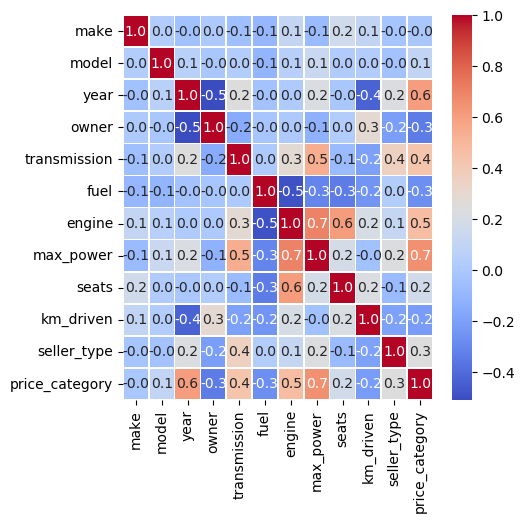

In [275]:
corr = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.1f')
plt.show()

### **Subsection 2: Feature Analysis**

- Create scatter plots to visualize the relationship between the variables that have positive and negative correlation identified in the previous step.
- Create barplots for each categorical feature to check for class imbalance.
- Check for outliers in the data using boxplots.
    - Hints: 
        - 1.Identify any outliers in the data, and determine if any features have a skewed distribution or class imbalance.
        - 2.Look for patterns and relationships between variables, and identify any variables that may be good predictors for the target variable.



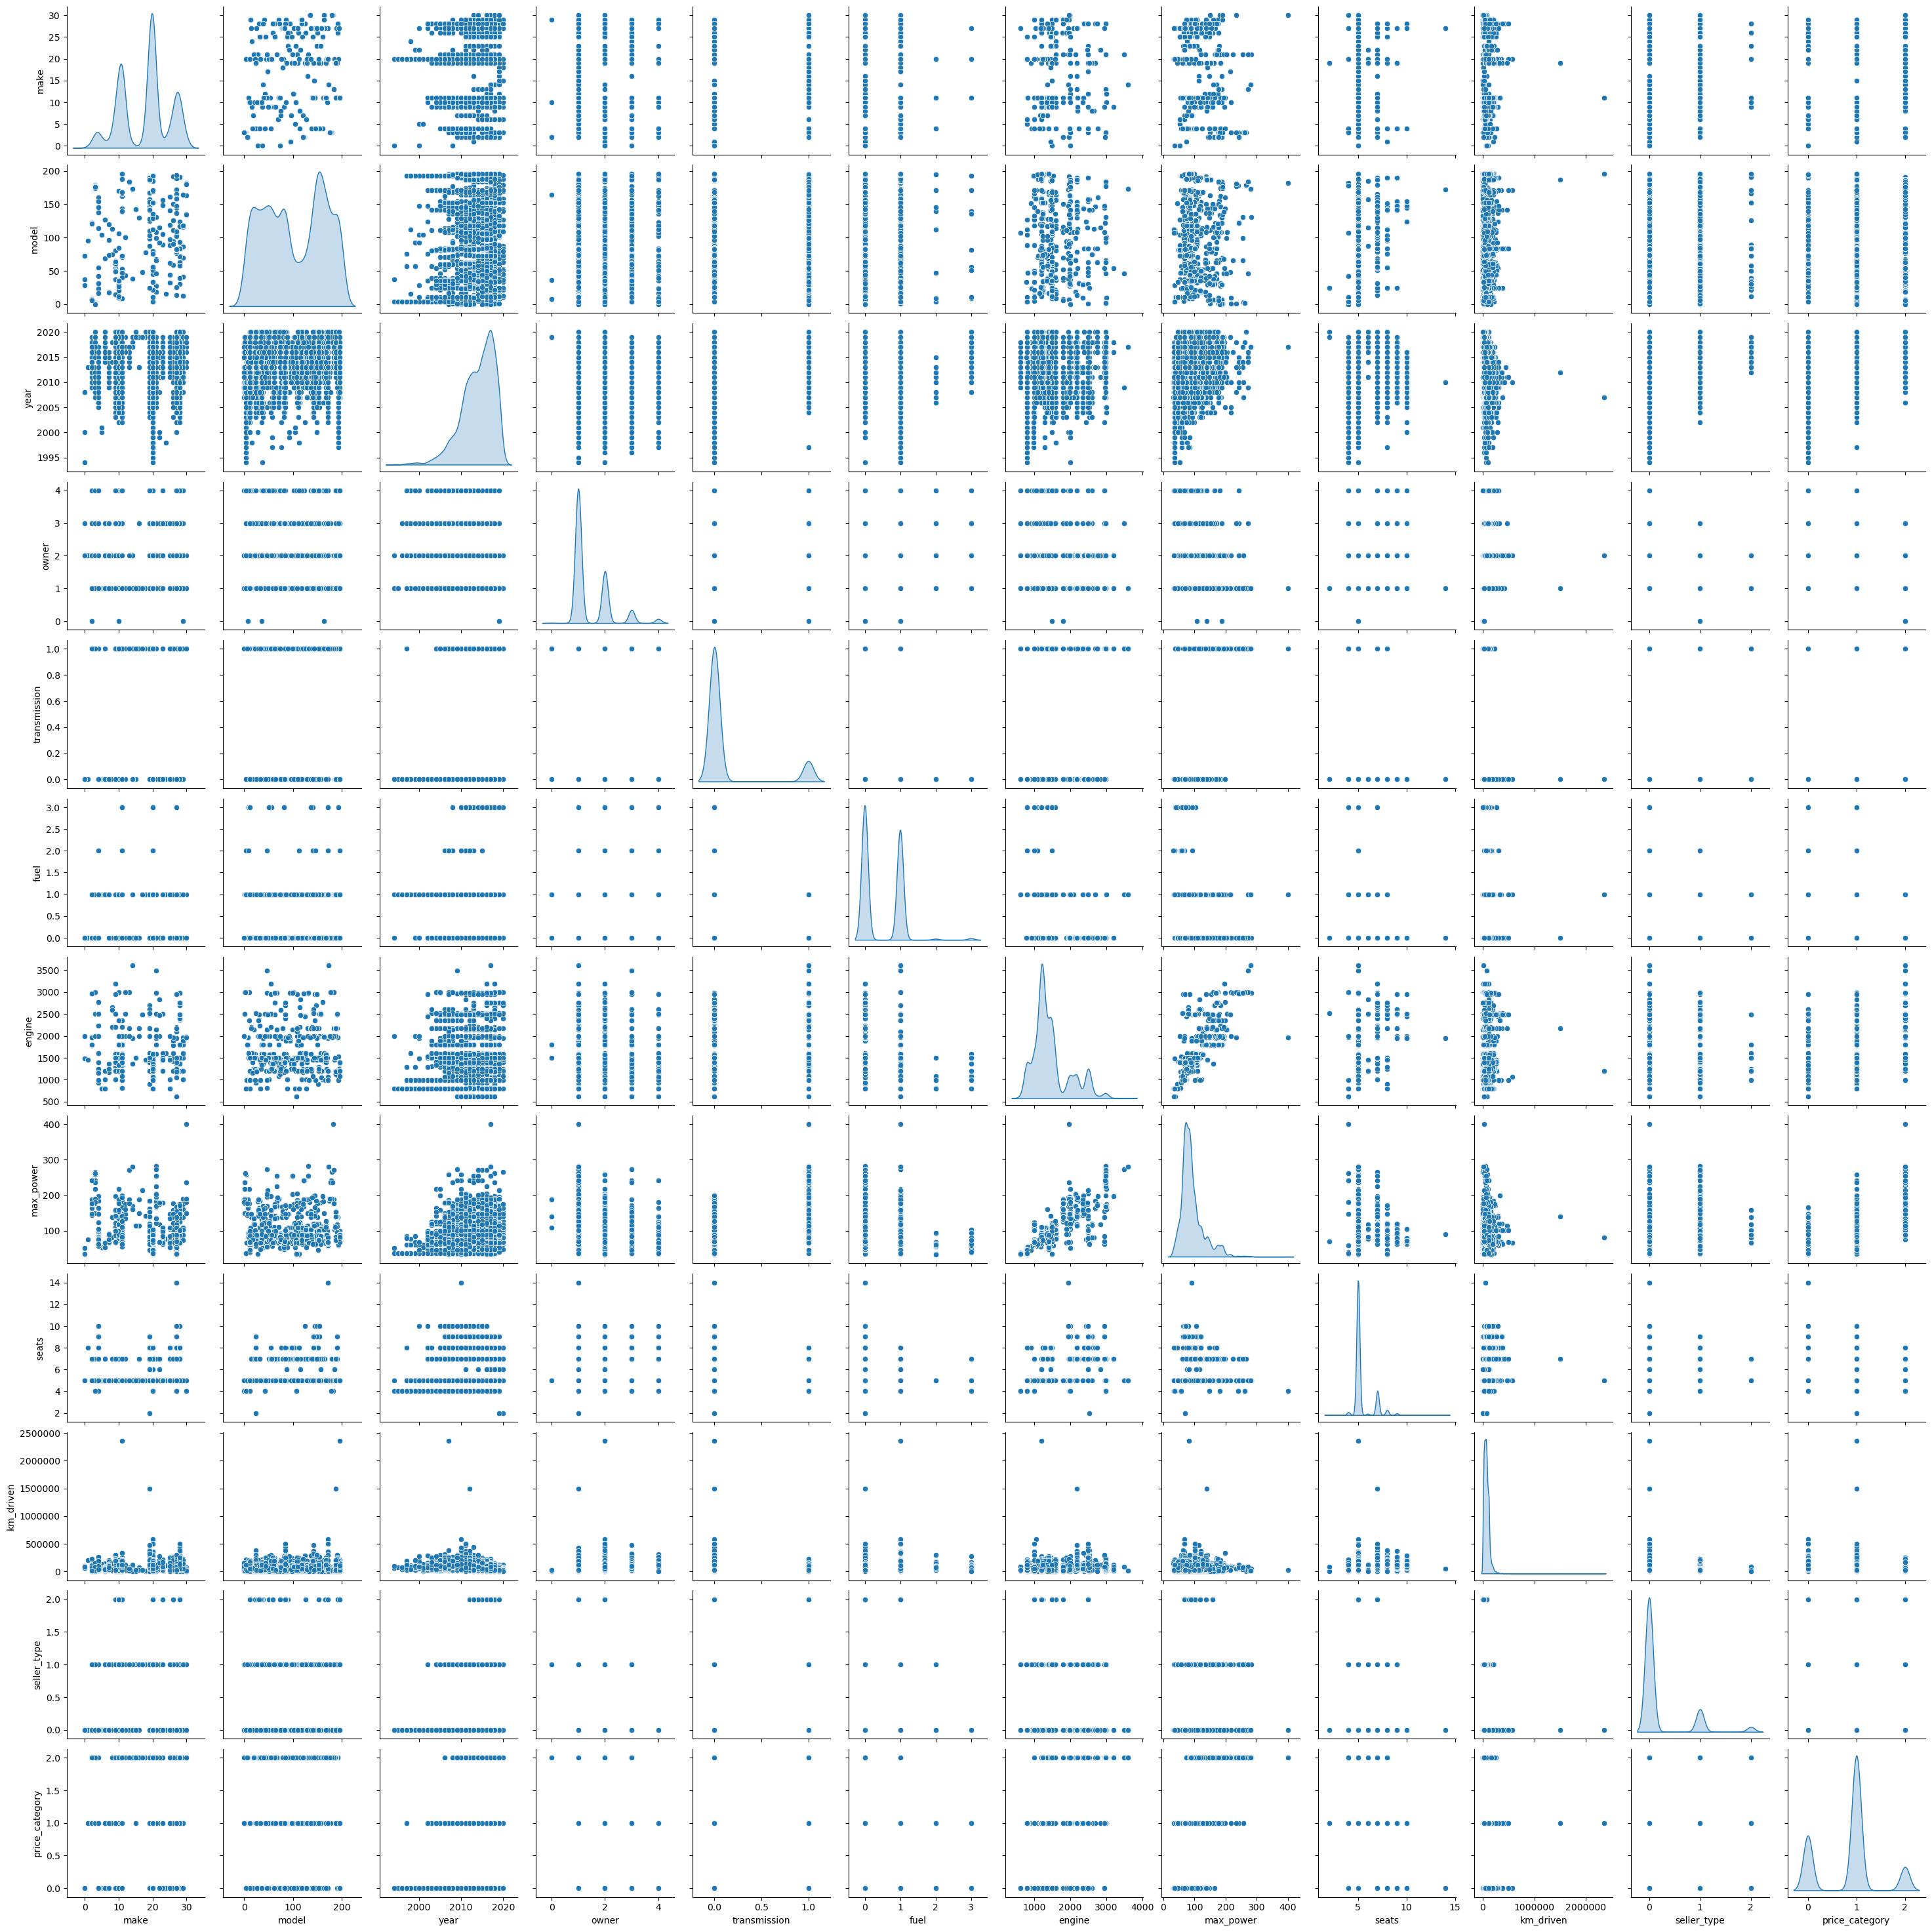

In [276]:
numeric_cols = ['make', 'model', 'year','owner','transmission','fuel','engine','max_power','seats','km_driven','seller_type','price_category']
sns.pairplot(df.loc[:,numeric_cols],diag_kind='kde',kind='scatter')
plt.show()

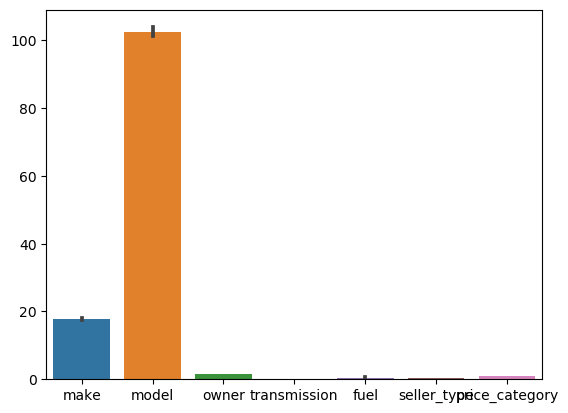

In [277]:
df_categories = df.drop(['year','engine','max_power','seats','km_driven'], axis=1)
sns.barplot(df_categories)

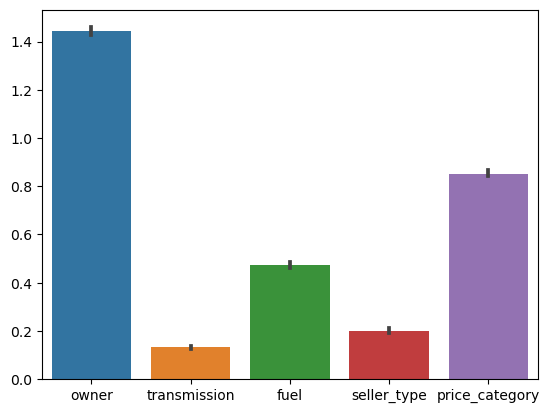

In [278]:
#address class imbalance

df_ = df.copy()
df = df_.drop(['make', 'model'], axis=1)

df_categories = df.drop(['year','engine','max_power','seats','km_driven'], axis=1)
sns.barplot(df_categories)

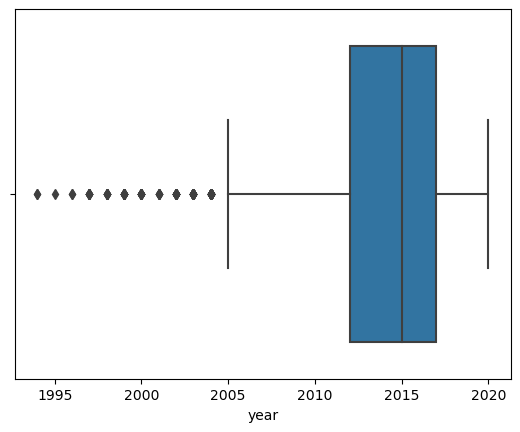

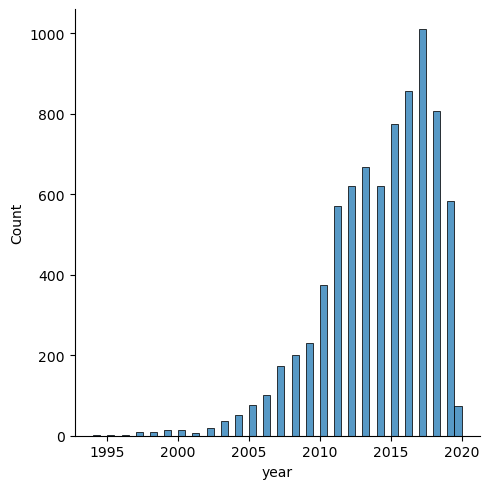

In [279]:
sns.boxplot(x=df['year'])
sns.displot(x=df['year'])

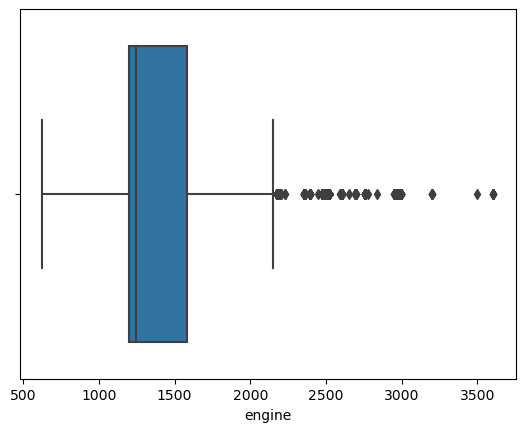

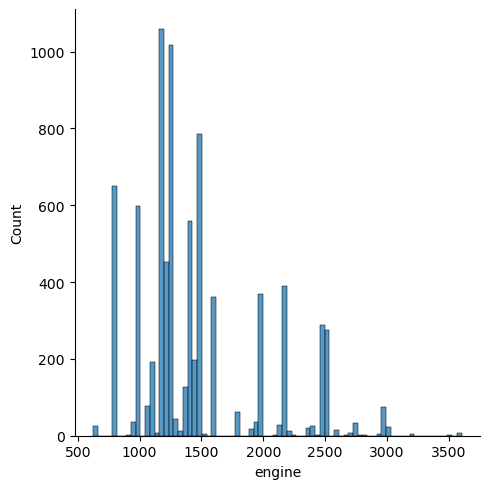

In [280]:
sns.boxplot(x=df['engine'])
sns.displot(x=df['engine'])

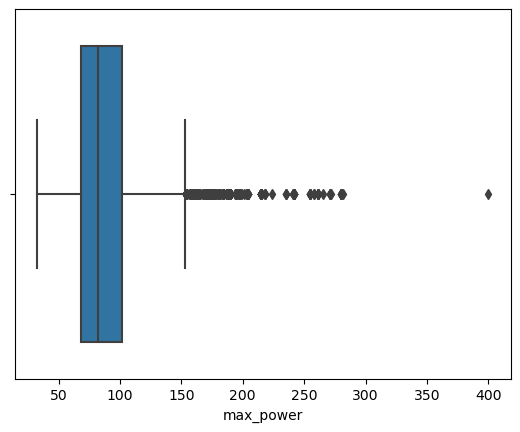

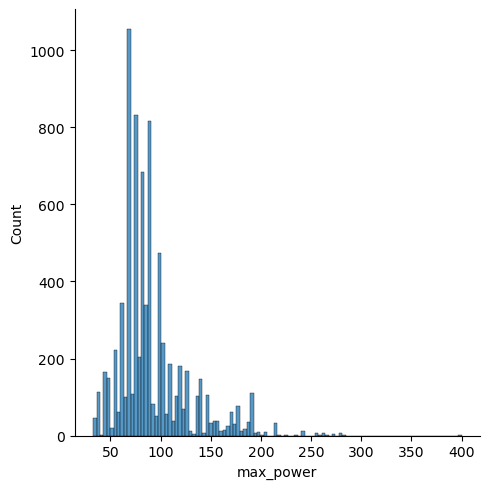

In [281]:
sns.boxplot(x=df['max_power'])
sns.displot(x=df['max_power'])

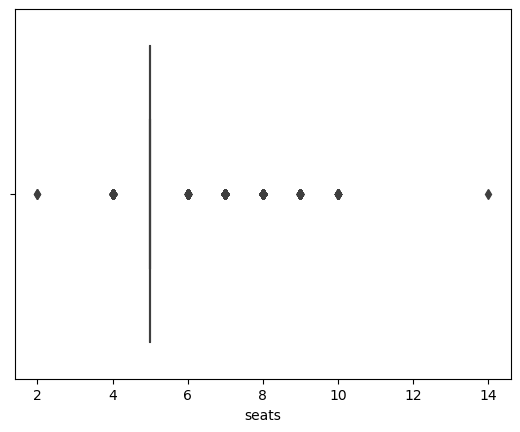

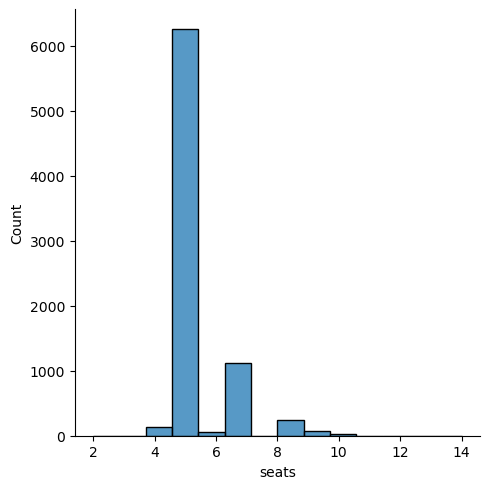

In [282]:
sns.boxplot(x=df['seats'])
sns.displot(x=df['seats'])

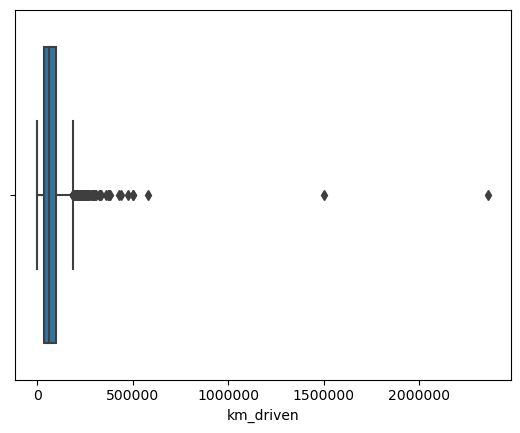

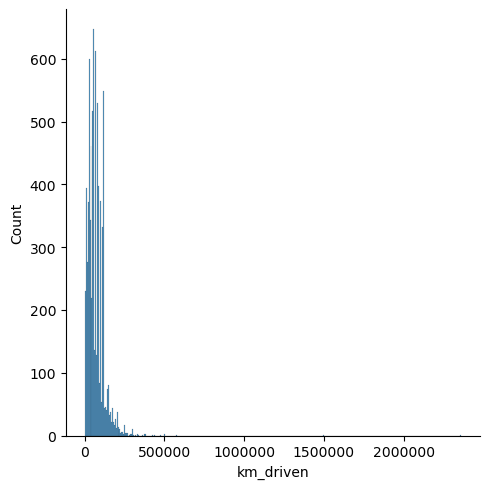

In [283]:
sns.boxplot(x=df['km_driven'])
sns.displot(x=df['km_driven'])

In [284]:
def removeOutliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
 
    print("IQR is: %s" % IQR)
    print("Lower Limit: %s" % lower_limit)
    print("Upper Limit: %s" % upper_limit)
    
    return [lower_limit, upper_limit]

In [285]:
# Remove outliers

limits_year = removeOutliers(df['year'])
limits_engine = removeOutliers(df['engine'])
limits_power = removeOutliers(df['max_power'])
limits_seats = removeOutliers(df['seats'])
limits_km = removeOutliers(df['km_driven'])

df = df[df['year'] > limits_year[0]]
df = df[df['year'] < limits_year[1]]

df = df[df['engine'] > limits_engine[0]]
df = df[df['engine'] < limits_engine[1]]

df = df[df['max_power'] > limits_power[0]]
df = df[df['max_power'] < limits_power[1]]

df = df[df['seats'] == limits_seats[0]]

df = df[df['km_driven'] > limits_km[0]]
df = df[df['km_driven'] < limits_km[1]]

IQR is: 5.0
Lower Limit: 2004.5
Upper Limit: 2024.5
IQR is: 385.0
Lower Limit: 619.5
Upper Limit: 2159.5
IQR is: 33.95
Lower Limit: 17.124999999999993
Upper Limit: 152.925
IQR is: 0.0
Lower Limit: 5.0
Upper Limit: 5.0
IQR is: 60425.0
Lower Limit: -55637.5
Upper Limit: 186062.5


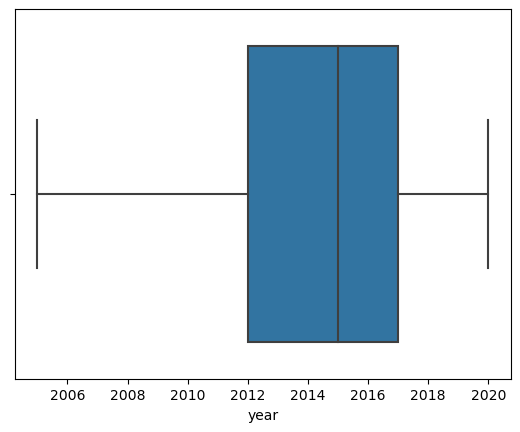

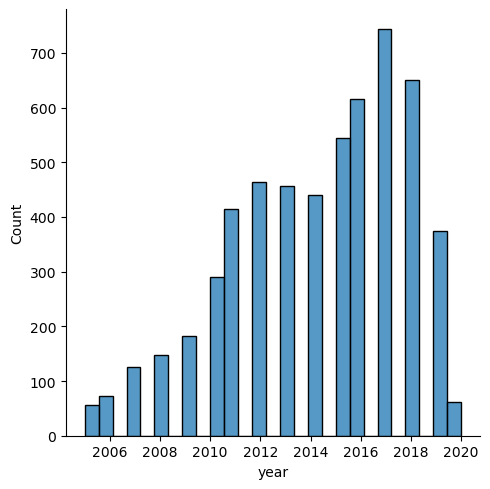

In [286]:
sns.boxplot(x=df['year'])
sns.displot(x=df['year'])

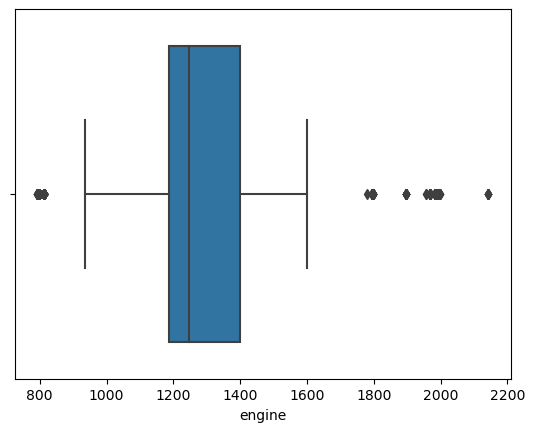

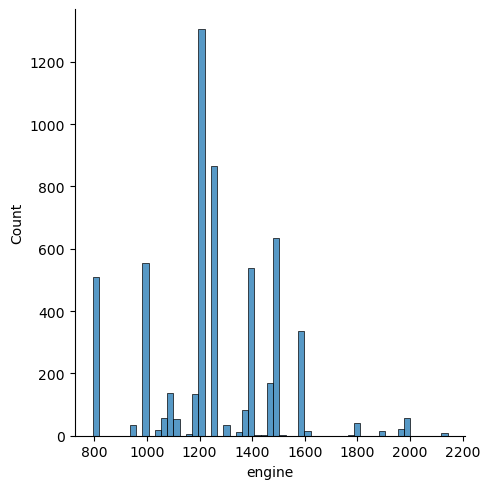

In [287]:
sns.boxplot(x=df['engine'])
sns.displot(x=df['engine'])

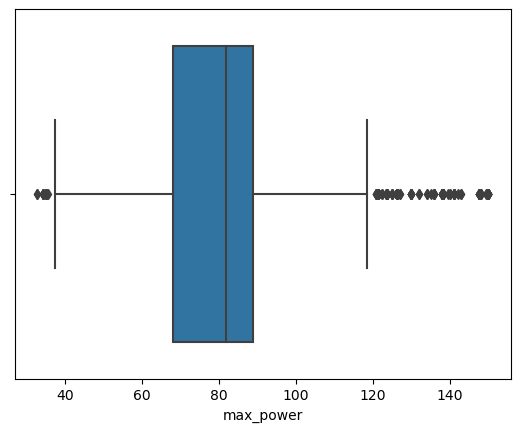

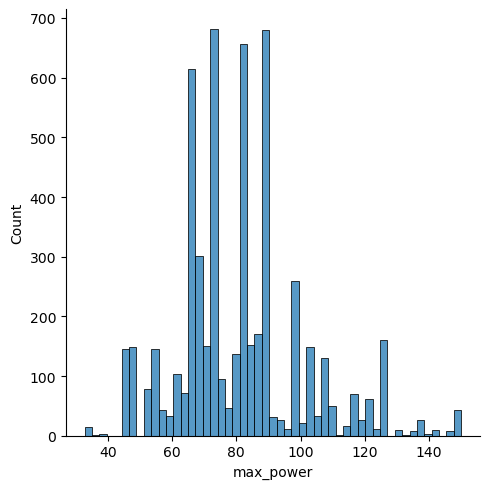

In [288]:
sns.boxplot(x=df['max_power'])
sns.displot(x=df['max_power'])

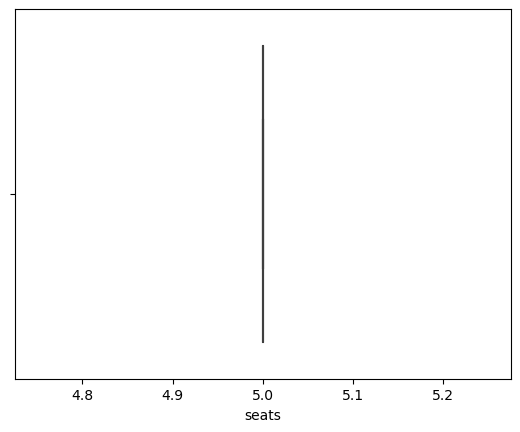

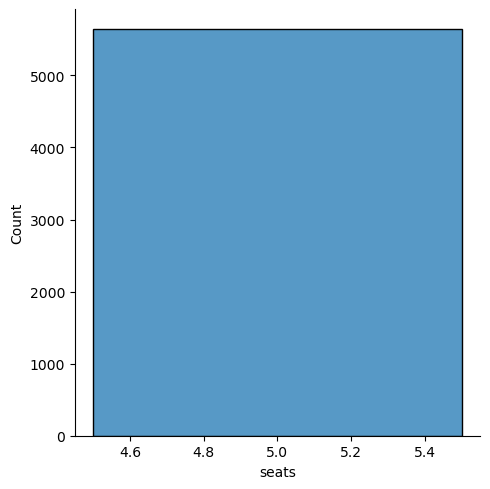

In [289]:
sns.boxplot(x=df['seats'])
sns.displot(x=df['seats'])

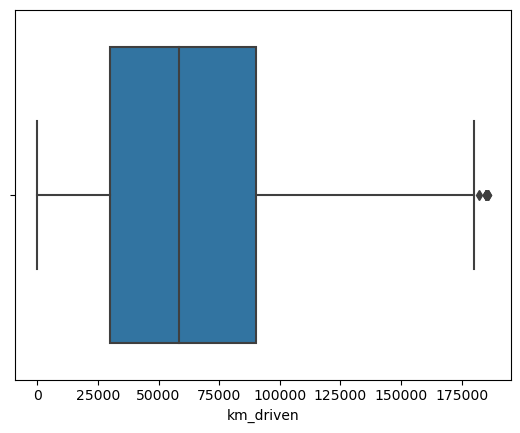

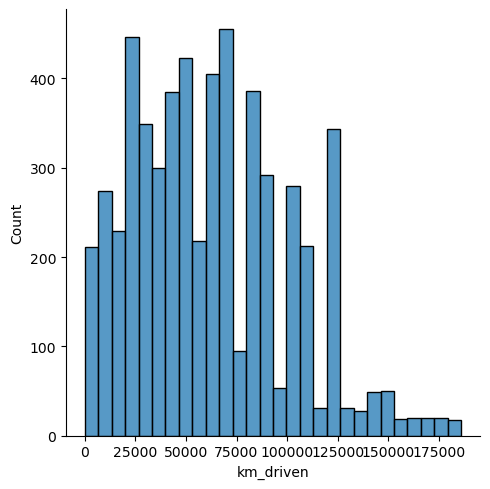

In [290]:
sns.boxplot(x=df['km_driven'])
sns.displot(x=df['km_driven'])

### **Subsection 3: Feature Selection**
- Identify the relevant features in the dataset that may affect the price of the car. You can use domain knowledge or explore the relationship between the different columns and the target column.
- Remove any irrelevant features that are not required for the analysis.


### **Subsection 4: Standardization**
- Standardize the remaining features in the dataset so that they have zero mean and unit variance. This will help in improving the performance of the machine learning algorithms.
- Use the StandardScaler class from the sklearn.preprocessing module to perform standardization.


In [291]:
X = df.drop(['price_category'], axis=1)
y = df['price_category']
print(X.shape, y.shape)

(5640, 9) (5640,)


### **Subsection 5: Data Splitting**
- Split the dataset into training and testing sets. The training set is used to train the machine learning model, and the testing set is used to evaluate its performance.
- Use the train_test_split() function from the sklearn.model_selection module to split the dataset.
- Ensure that the split is random and stratified, so that the distribution of classes in the training and testing sets is similar.


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("----Training Data ----")
print(X_train.shape, y_train.shape)
print("----Test Data ----")
print(X_test.shape, y_test.shape)

----Training Data ----
(3948, 9) (3948,)
----Test Data ----
(1692, 9) (1692,)


In [293]:
for i in range(5):
    print("Training Set:", X_train[i], y_train.iloc[i])
    print("Testing Set:", X_test[i], y_test.iloc[i])

Training Set: [ 1.38810411 -0.61053424 -0.31140228 -1.02352907 -0.02523381 -0.3721046
  0.         -1.10160145 -0.40859981] 1
Testing Set: [-0.05748677 -0.61053424 -0.31140228 -1.02352907  1.02400446  0.85022921
  0.          0.21000888 -0.40859981] 1
Training Set: [-1.21395947  0.84589427 -0.31140228 -1.02352907  0.60850611 -0.67147195
  0.          2.83322954 -0.40859981] 0
Testing Set: [ 0.52074958 -0.61053424 -0.31140228 -1.02352907  1.02400446  0.85022921
  0.         -0.00207851 -0.40859981] 1
Training Set: [ 0.23163141 -0.61053424 -0.31140228  0.77003186 -0.25606623  0.35791413
  0.         -0.31463525 -0.40859981] 1
Testing Set: [-1.21395947 -0.61053424 -0.31140228  0.77003186 -1.9222566  -1.75058682
  0.          0.47233095 -0.40859981] 0
Training Set: [-0.05748677 -0.61053424 -0.31140228 -1.02352907  0.60850611 -0.72120074
  0.          0.48077772  1.7596153 ] 1
Testing Set: [ 0.52074958 -0.61053424 -0.31140228  0.77003186 -1.9222566  -1.70085802
  0.         -0.83927938 -0.4

## Coding Task 3 : Model Training and Evaluation

In this task, you will train a machine learning model to predict the price category of a car based on its features. You will use the training set to train the model, and the testing set to evaluate its performance.

### **Subsection 1: Model Training**
- Train a logistic regression model on the training set.
- Use the LogisticRegression class from the sklearn.linear_model module to train the model.
- Use the default parameters for the model.
- Use the training set to train the model.
- Use the predict() method to make predictions on the testing set.
- Use the accuracy_score() function from the sklearn.metrics module to evaluate the model's performance on the testing set.

In [294]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
log_train = round(lr.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

### **Subsection 2: Model Evaluation**
- Use the confusion matrix to evaluate the model's performance on the testing set.
- Use the classification_report() function from the sklearn.metrics module to evaluate the model's performance on the testing set.
- Use the roc_auc_score() function from the sklearn.metrics module to evaluate the model's performance on the testing set.

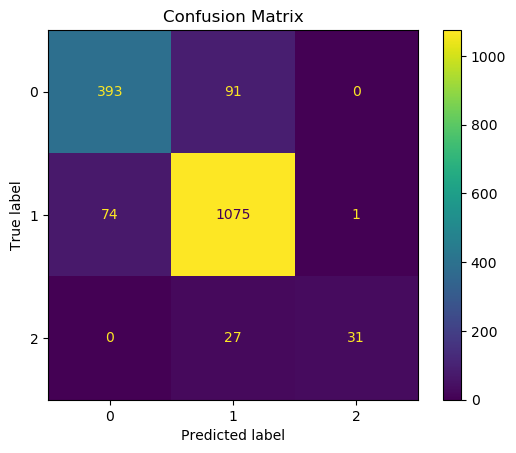

In [295]:
# Show Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title('Confusion Matrix')
plt.show()

In [296]:
# Logistic Classifier Results
print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr,zero_division=0))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 88.55 %
Model Accuracy Score : 88.59 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       484
           1       0.90      0.93      0.92      1150
           2       0.97      0.53      0.69        58

    accuracy                           0.89      1692
   macro avg       0.90      0.76      0.81      1692
weighted avg       0.89      0.89      0.88      1692

--------------------------------------------------------


In [297]:
roc = round(roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr')*100, 2)
roc

95.68

### **Subsection 3: Model Tuning (Optional)**
- Tune the model to improve its performance.
- Use the GridSearchCV class from the sklearn.model_selection module to tune the model.
- Use the following parameters for the model:
    - penalty: l1, l2 ( Regularization penalty term )
    - C: 0.1, 0.5, 1, 2, 5 ( Inverse of regularization strength )

In [298]:
lr = LogisticRegression(solver='liblinear', random_state=0)

param = {'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1, 2, 5]}
lrp = GridSearchCV(lr, param)
lrp.fit(X_train, y_train)

print("Tuned Parameters : ", lrp.best_params_) 
print("Accuracy :", lrp.best_score_*100)

Tuned Parameters :  {'C': 5, 'penalty': 'l1'}
Accuracy : 87.81627119731755
